<a href="https://colab.research.google.com/github/RidhaAnsar/MachineLearning/blob/main/LogisticRegression-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.88
Precision: 0.88
Recall: 0.75
F1 Score: 0.81


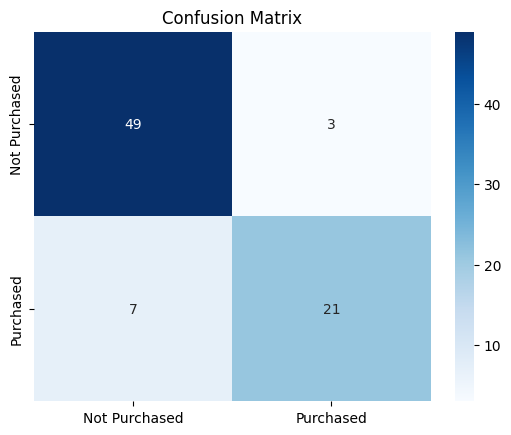

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('User_Data.csv').dropna()
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)

# Feature and target variables
X, y = df.drop('Purchased', axis=1), df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features and fit model
X_train, X_test = StandardScaler().fit_transform(X_train), StandardScaler().fit_transform(X_test)
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.show()
